# Optimizing Julia Set Calculations

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from atomlib.utils import timefn

In [ ]:
@timefn
def calc_pure_python(desired_width, max_iterations):
    # Create a list of complex coordinates and complex parameters
    x_step = (float(x2-x1)/float(desired_width))
    y_step = (float(y1-y2)/float(desired_width))
    x = []
    y = []
        
    ycoord = y2
    while ycoord > y1:
        y.append(ycoord)
        ycoord += y_step
        
    xcoord = x1
    while xcoord < x2:
        x.append(xcoord)
        xcoord += x_step

    # Build a list of coordinates and the initial condition for each cell.
    # Note that our initial condition is a constant and could easily be removed
    # We use it to simulate a real-world scenario with several inputs to our function.
    zs = []
    cs = []
    for ycoord in y:
        for xcoord in x:
            zs.append(complex(xcoord, ycoord))
            cs.append(complex(c_real, c_imag))
            
    output = calculate_z_serial_purepython(max_iterations, zs, cs)
    
    # This is expected for a 1000^2 grid with 300 iterations.
    # It catches minor errors we might introduce when we're
    # working on a fixed set of inputs
    assert sum(output) == 33219980, sum(output)
    return output

In [ ]:
@timefn
def calculate_z_serial_purepython(maxiter, zs, cs):
    output = [0] * len(zs)
    for i in range(len(zs)):
        n = 0
        z = zs[i]
        c = cs[i]
        while abs(z) < 2 and n < maxiter:
            z = z * z + c
            n += 1
        output[i] = n
            
    return output 

In [ ]:
# area of complex space to investigate
x1, x2, y1, y2 = -1.8, 1.8, -1.8, 1.8
c_real, c_imag = -.62772, -.42193

# Calculate the Julia sset using a pure Python solution with reasonable defaults for a laptop
desired_width = 1000
max_iterations = 300
output = calc_pure_python(desired_width, max_iterations)

@timefn: calculate_z_serial_purepython took 6.407025098800659 seconds
@timefn: calc_pure_python took 6.787338733673096 seconds


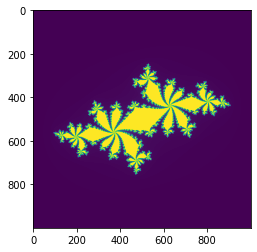

In [ ]:
plt.imshow(np.reshape(output, (desired_width, desired_width)))
plt.show()